In [9]:
import ect
from ect.optimizers import ECTFilterOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/20
ect_offset = radius/10

n_knots = 20

In [10]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [11]:
opt = ECTFilterOptimizer(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
    do_snf=False
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-22.977
Current loss=-23.961
Current loss=-24.331
Current loss=-24.920
Current loss=-25.664
Current loss=-26.323
Current loss=-26.431
Current loss=-26.464
Current loss=-26.519
Current loss=-26.589
Current loss=-26.606
Current loss=-26.626
Current loss=-26.648
Current loss=-26.674
Current loss=-26.689
Current loss=-26.693
Current loss=-26.699
Current loss=-26.706
Current loss=-26.714
Current loss=-26.719
Current loss=-26.724
Current loss=-26.727
Current loss=-26.729
Current loss=-26.731
Current loss=-26.733
Current loss=-26.734
Current loss=-26.735
Current loss=-26.736
Current loss=-26.736
Current loss=-26.737
Current loss=-26.737
Current loss=-26.737
Current loss=-26.737
Current loss=-26.737
Current loss=-26.737
Current loss=-26.737
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=-26.738
Current loss=

In [12]:
result

      fun: -26.737858679377045
 hess_inv: array([[ 7.79514495e+01, -4.02077988e+02, -6.41891360e+01,
         3.50379890e+01,  1.63697686e+01,  2.45029935e+01,
         1.04420678e+01,  2.09877321e+01,  1.74547726e+01,
         1.76409789e+01,  1.75004255e+01,  1.76355239e+01,
         1.75347103e+01,  1.75649649e+01,  1.76779822e+01,
         1.75169266e+01,  1.68862880e+01,  1.25939503e+01,
         5.24742208e+01,  5.07067610e+01],
       [-4.02077988e+02,  2.12822011e+03,  3.48702532e+02,
        -1.87390392e+02, -7.91225370e+01, -1.26935475e+02,
        -4.55933588e+01, -1.06405944e+02, -8.63276640e+01,
        -8.75087695e+01, -8.67516975e+01, -8.75663371e+01,
        -8.71186266e+01, -8.74970147e+01, -8.79609678e+01,
        -8.70480254e+01, -8.37736282e+01, -5.95823791e+01,
        -2.89532137e+02, -3.47934012e+02],
       [-6.41891360e+01,  3.48702532e+02,  8.66827027e+01,
        -4.26959284e+01, -7.91330704e+00, -2.05265846e+01,
        -2.96535703e+00, -1.57310786e+01, -1.1

opt.loss(solution)=-26.737858679377045


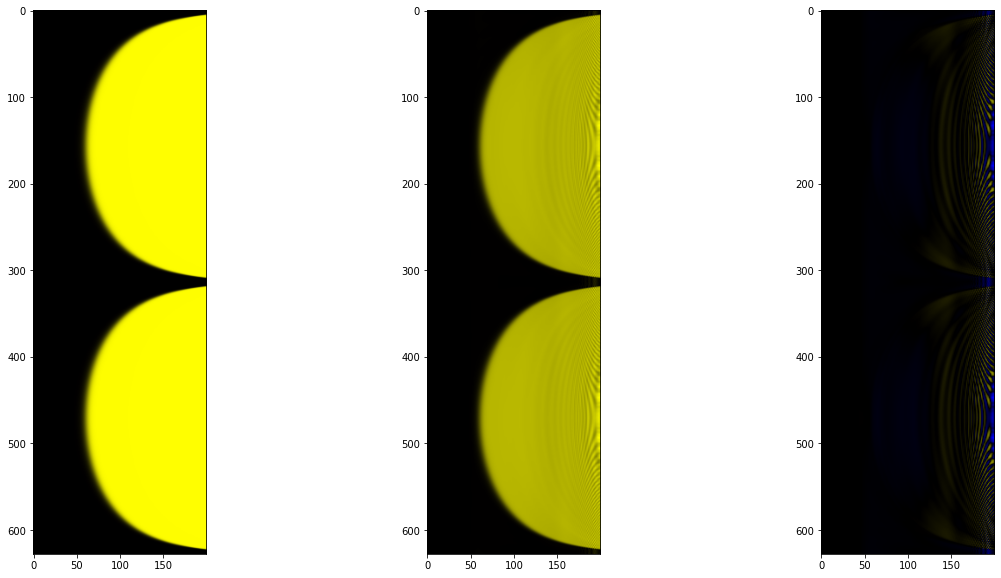

In [13]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [14]:
res = opt.inv

knots_freq = solution
# knots_space = solution[n_knots:]

fnf = ect.freqnorm(res.shape[:2], radius, knots_freq)
# snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_freq=}")

knots_freq=array([ 3.70367723, -2.31597364,  0.5152662 ,  0.68753025,  0.77596145,
        0.65037929,  0.68520013,  0.52868933,  0.65399019,  0.62152355,
        0.77426207,  0.67075986,  0.67845271,  0.66151224,  0.68006061,
        0.65068482,  0.65594299,  0.62704657,  0.67423337,  0.75850602])


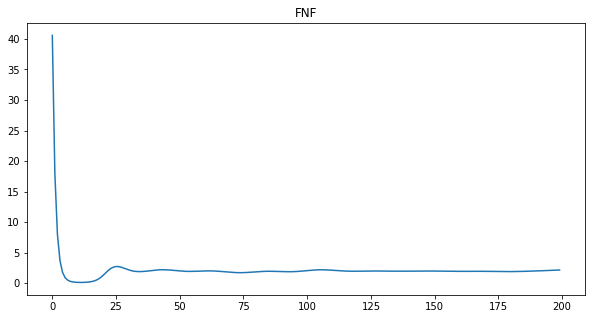

In [15]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.title("FNF")
plt.plot(fnf[0,:])

# plt.subplot(1, 2, 2)
# plt.title("SNF")
# plt.plot(snf[0,:])

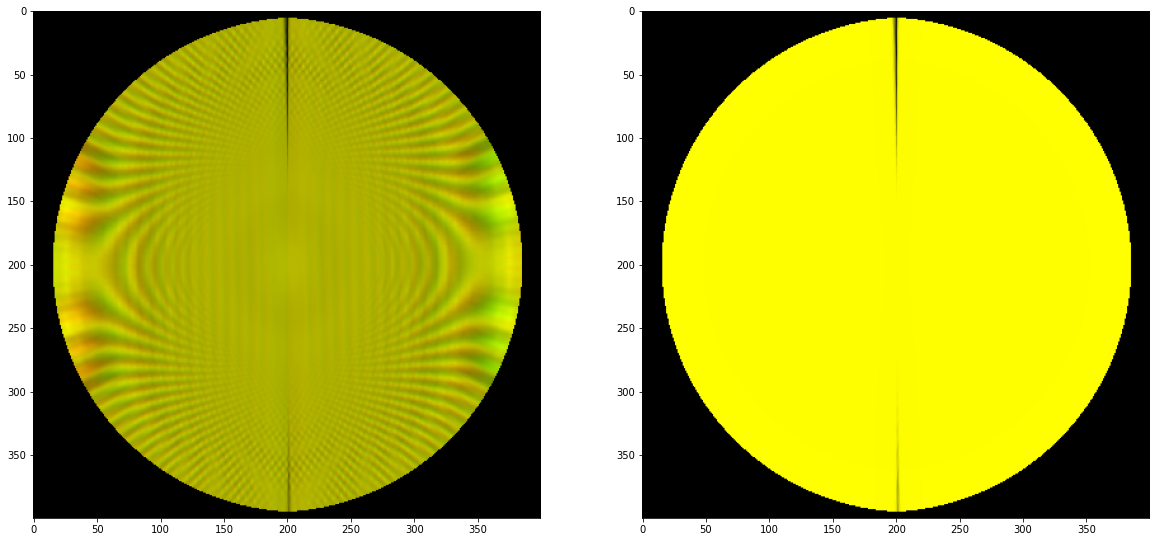

In [16]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)